# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('ggplot')
sns.set_style('white')

In [2]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    sns.scatterplot(
        data = spam,
        x = [s[0][0] for s in spam],
        y = [s[0][1] for s in spam],
        color = 'cyan',
        edgecolor = 'k',
        marker = '^'
    )
    sns.scatterplot(
        data = ham,
        x = [s[0][0] for s in ham],
        y = [s[0][1] for s in ham],
        color = 'red',
        edgecolor = 'k',
        marker = 's'
    )
    plt.legend(['label 1', 'label 0'])

## Building a linear Data Set

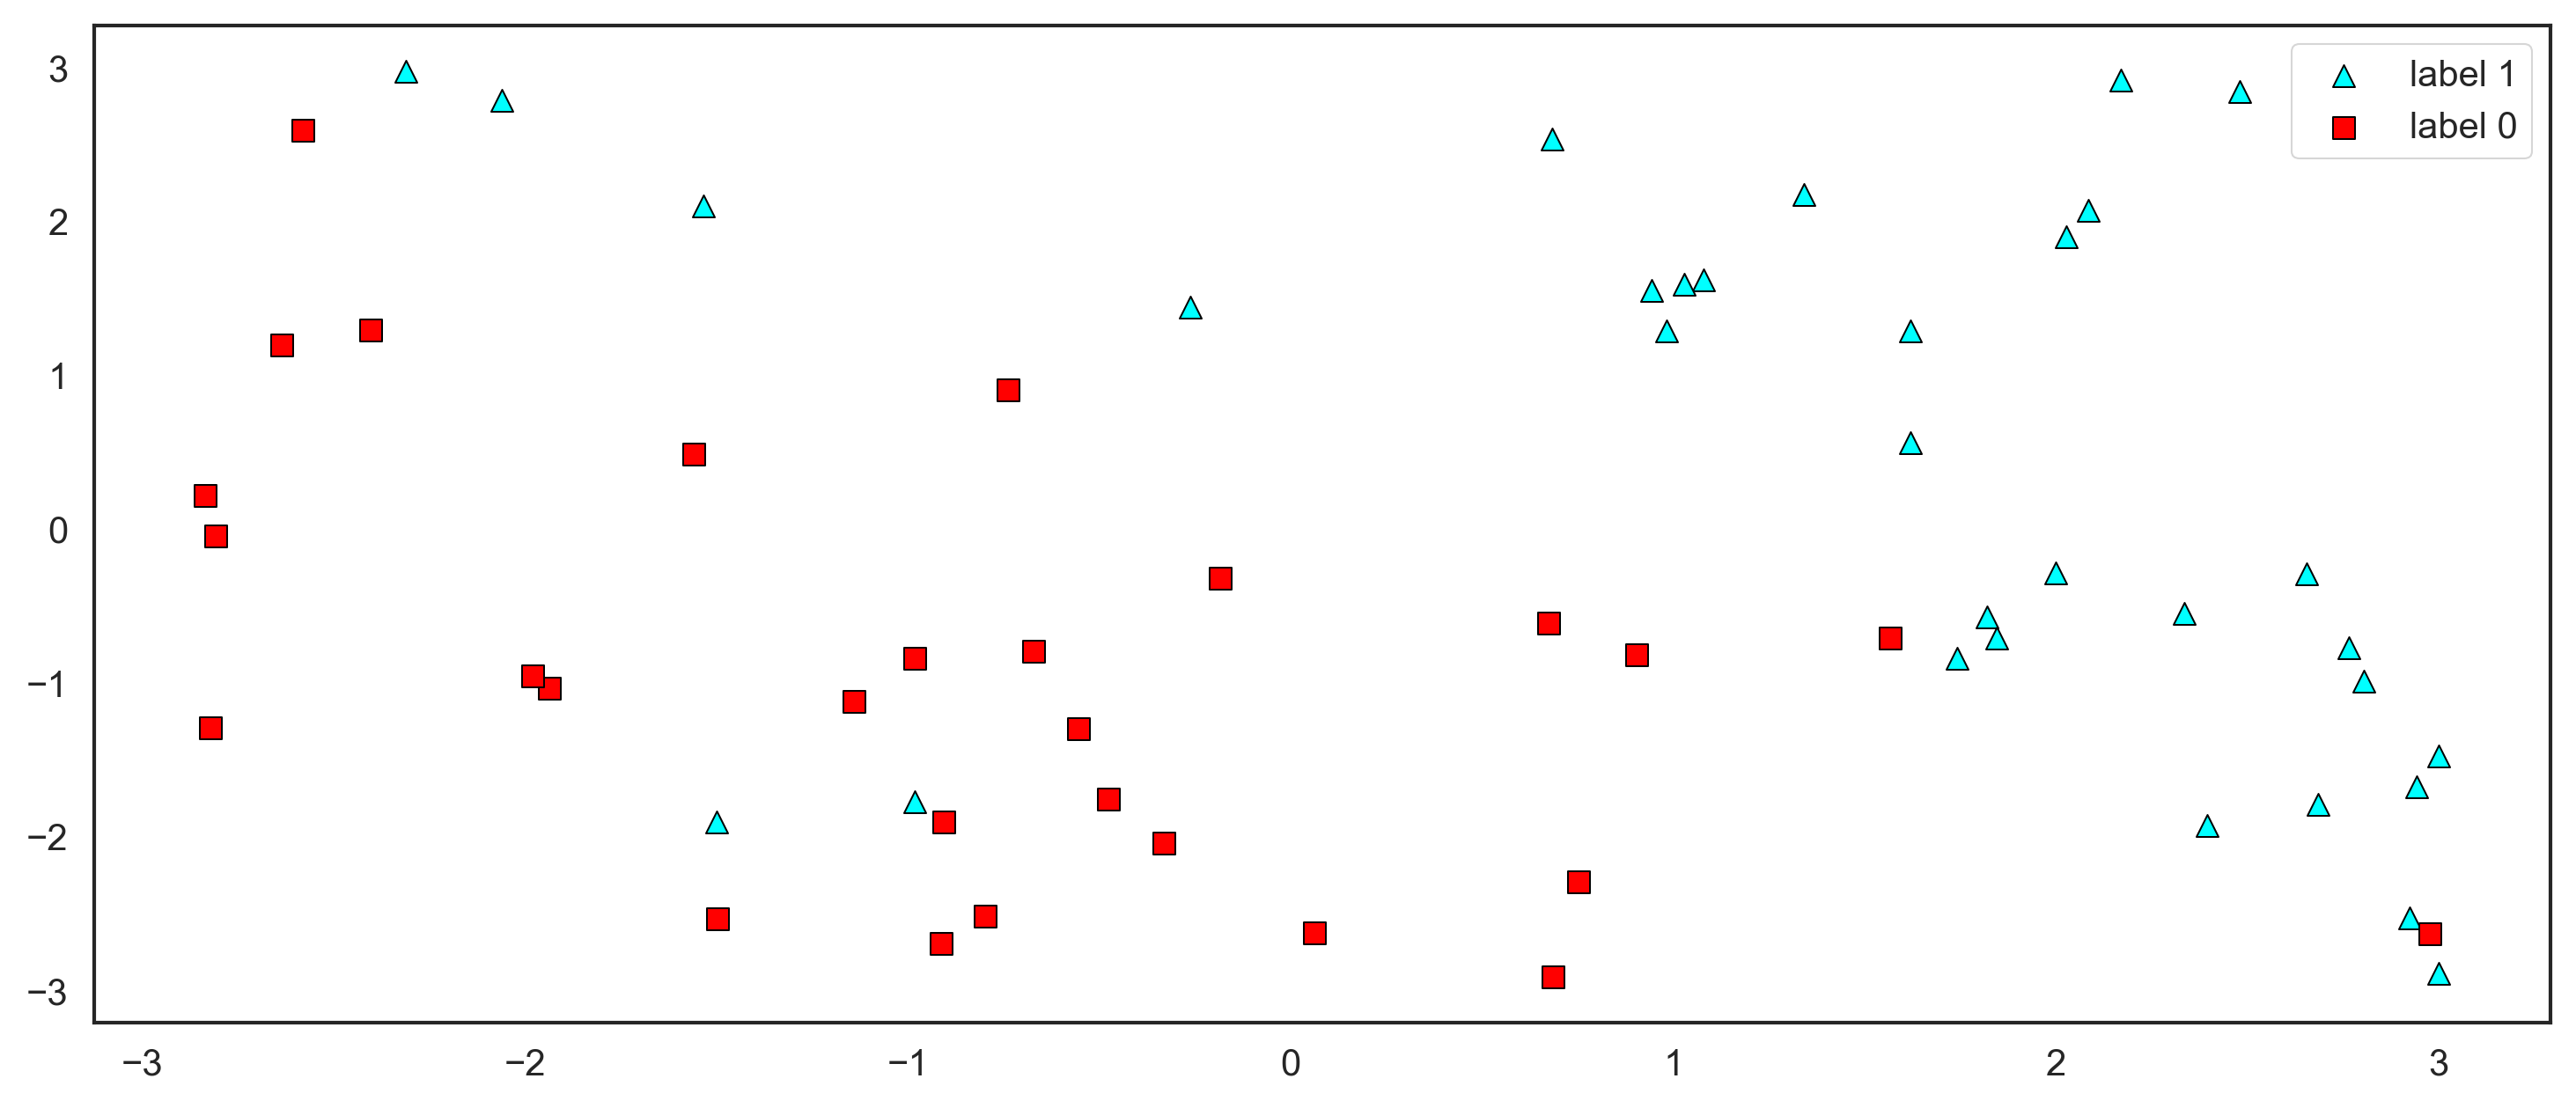

In [3]:
import  random

rows = []
for i in range(50):
    x = 6*random.random() - 3
    y = 6*random.random() - 3
    z = int(x+y > 0.5)
    rows.append([x,y,z])

# adding noise
for i in range(10):
    x = 6*random.random() - 3
    y = 6*random.random() - 3
    z = random.randint(0,1)
    rows.append([x,y,z])

df_linear = pd.DataFrame(data=rows,columns=['x_1', 'x_2', 'y'])
plot_points(features=df_linear[['x_1', 'x_2']], labels=df_linear['y'])

## Circular Dataset

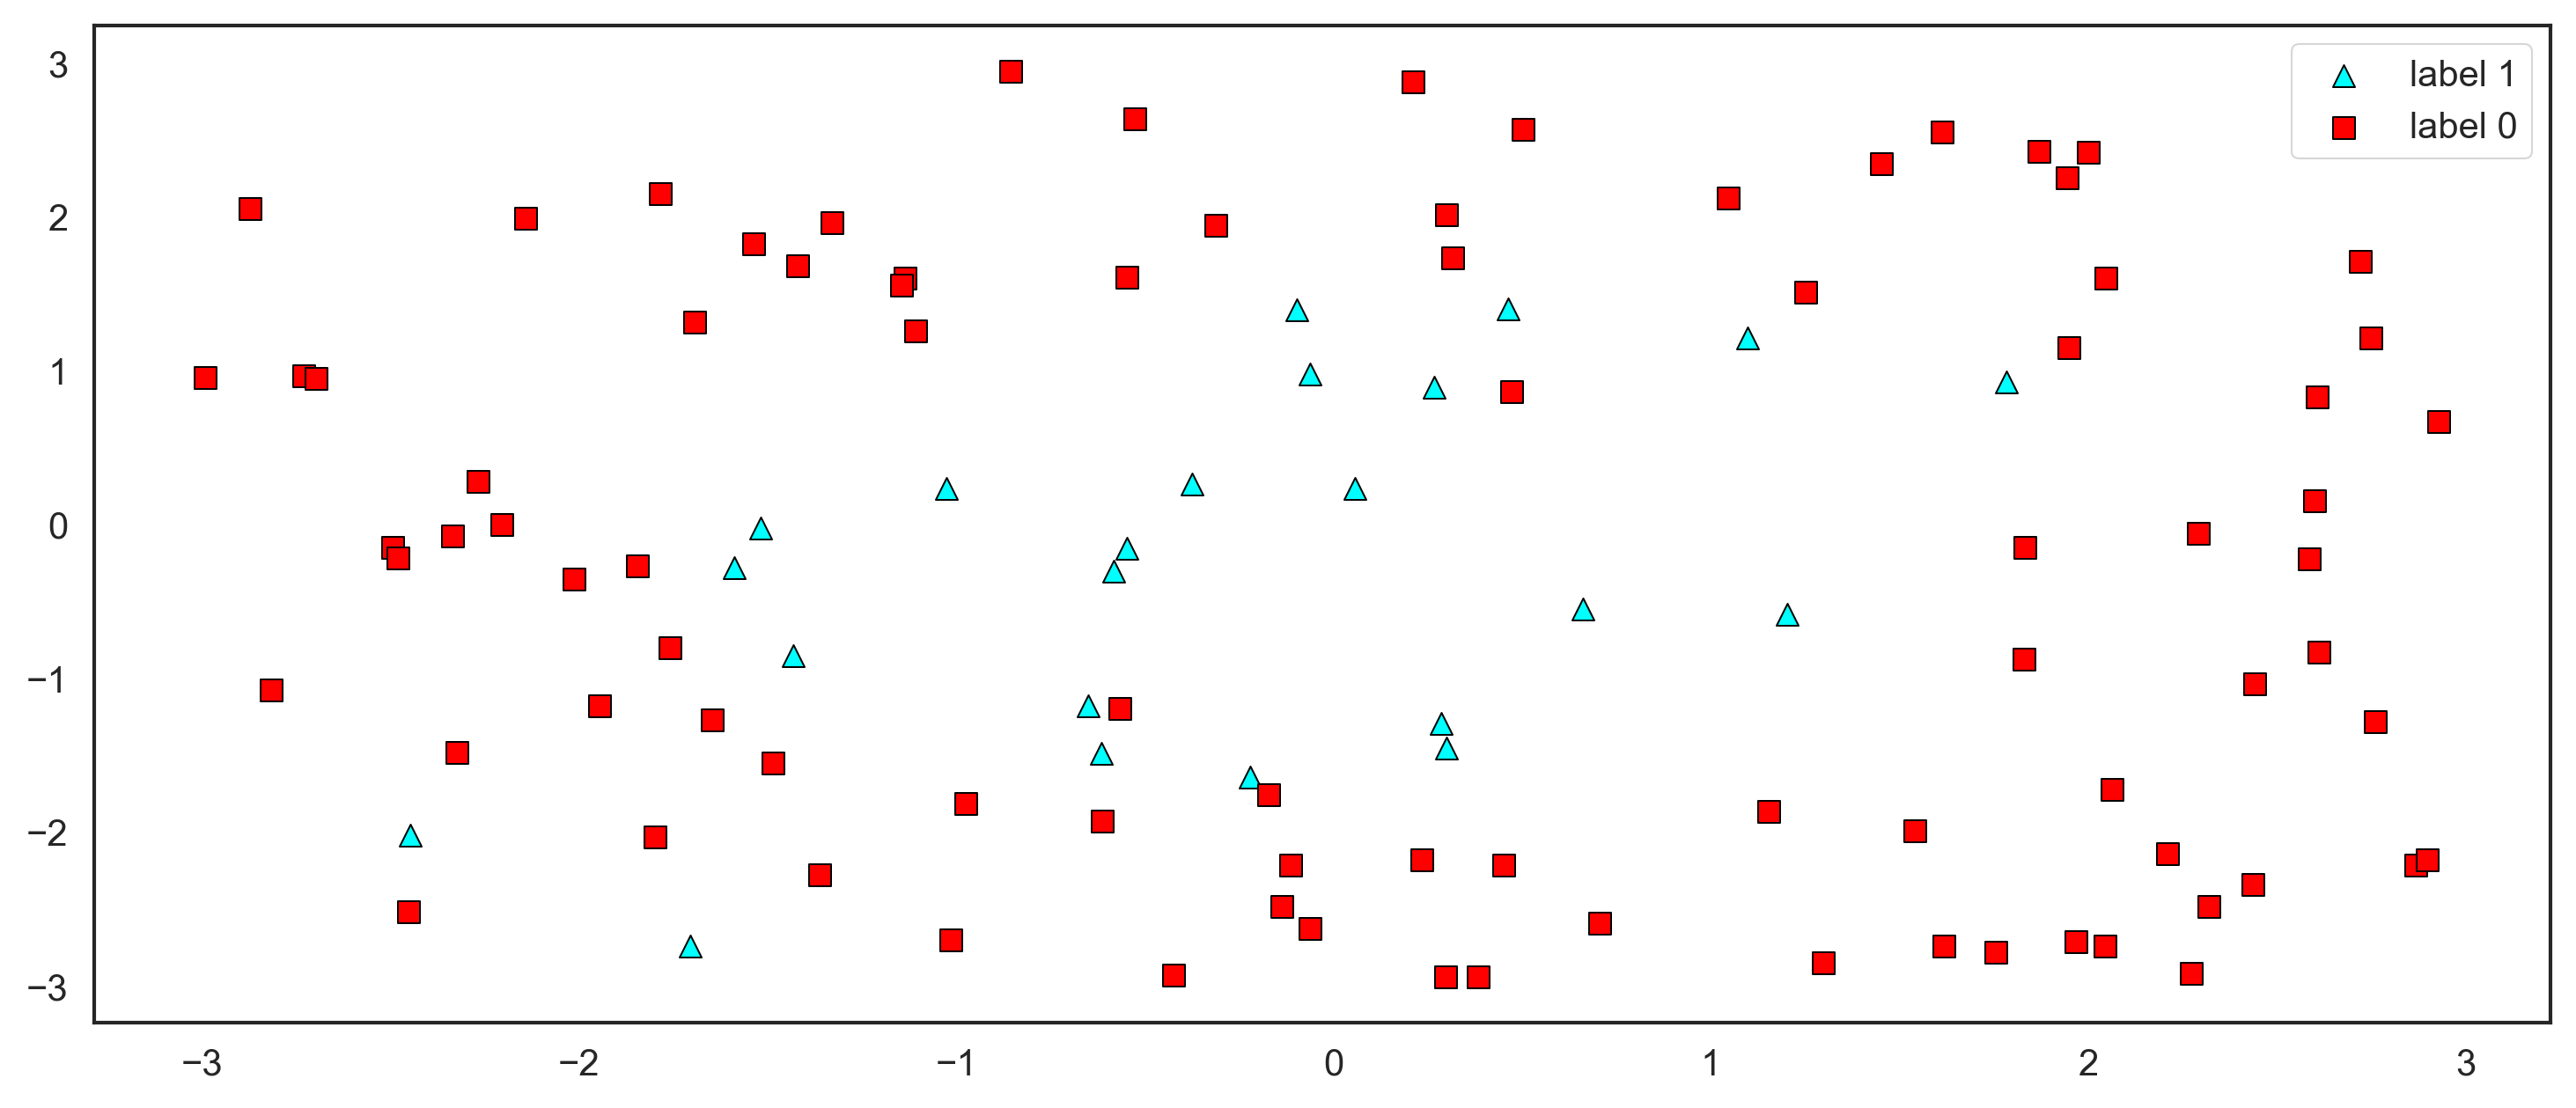

In [4]:
rows = []

import random

#Adding points
for i in range(100):
    x = 6*random.random()-3
    y = 6*random.random()-3
    z = int((x)**2+y**2 < 2.8)
    rows.append([x,y,z])

#Adding noise
for i in range(10):
    x = 6*random.random()-3
    y = 6*random.random()-3
    z = random.randint(0,1)
    rows.append([x,y,z])


df_one_circle = pd.DataFrame(data=rows, columns=['x_1', 'x_2', 'y'])
plot_points(features=df_one_circle[['x_1', 'x_2']], labels=df_one_circle['y'])

# SVM to separate a linear Dataset

In [5]:
from sklearn.svm import SVC
import utils
import  warnings
warnings.filterwarnings(action='ignore')

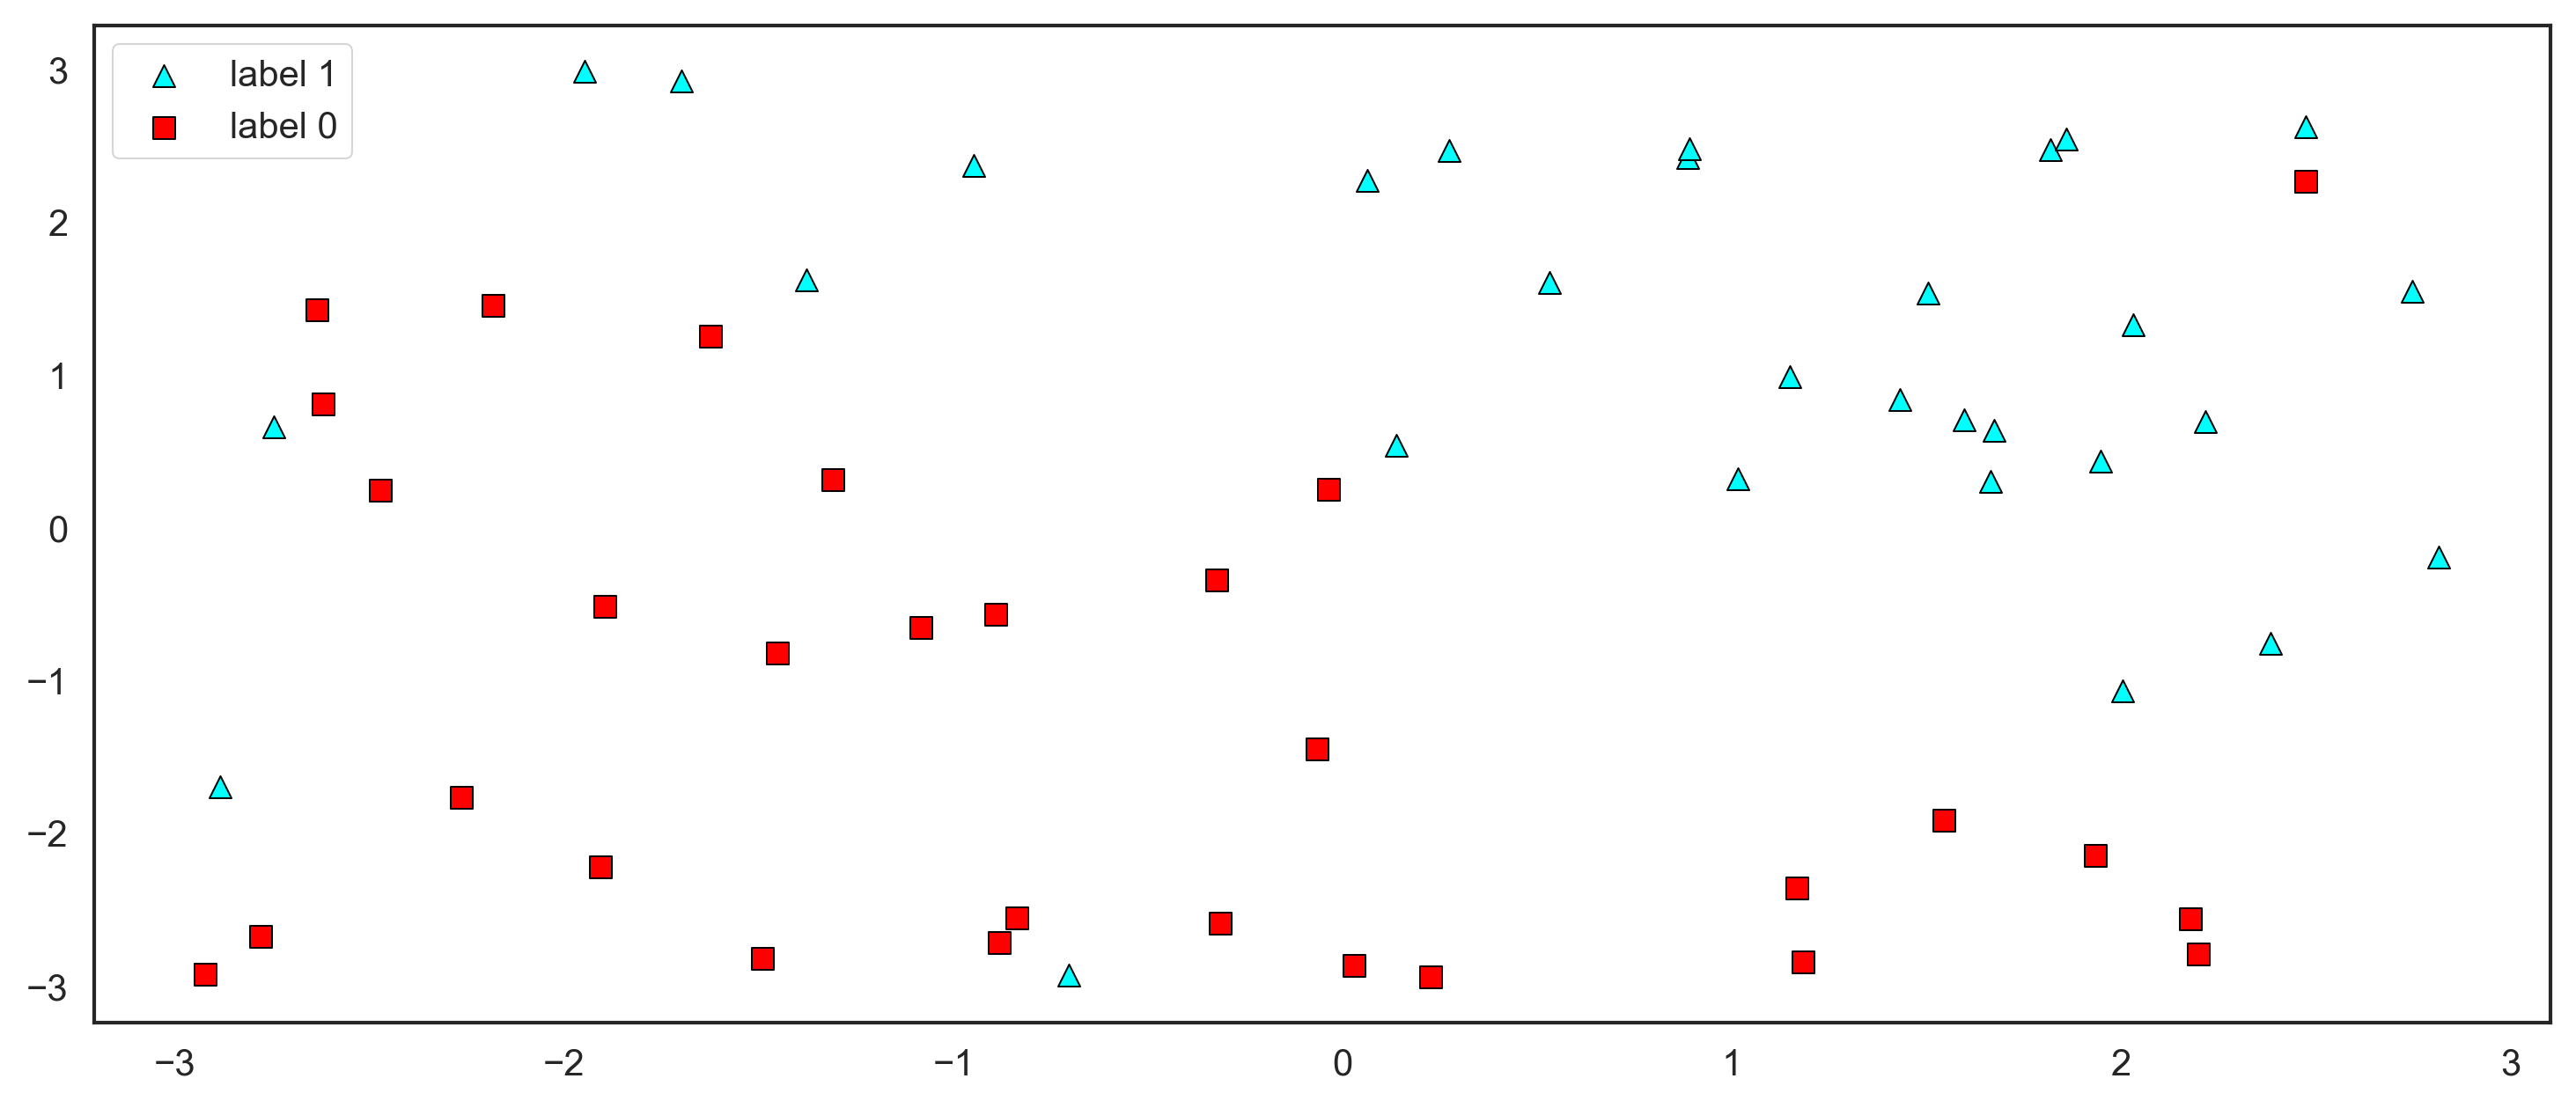

In [6]:
linear_data = pd.read_csv('datasets/linear.csv')
features = np.array(linear_data[['x_1', 'x_2']])
labels = np.array((linear_data['y']))
plot_points(features=features, labels=labels)

In [7]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(features, labels)
print("Accuracy:", svm_linear.score(features, labels))

Accuracy: 0.9333333333333333


In [8]:
# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(features, labels)
print("C = 0.01")
print("Accuracy:", svm_c_001.score(features, labels))

C = 0.01
Accuracy: 0.8666666666666667


In [9]:

# C = 100
svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(features, labels)
print("C = 100")
print("Accuracy:", svm_c_100.score(features, labels))

C = 100
Accuracy: 0.9166666666666666


# Using similarity matrix to fit a SVM

In [15]:
data = pd.DataFrame(data = {
    'x1':[0,-1,0,0,1,-1,1],
    'x2' : [0,0,-1,1,0,1,-1],
    'y' : [0,0,0,1,1,1,1]
})

In [16]:
data

,x1,x2,y
0,0,0,0
1,-1,0,0
2,0,-1,0
3,0,1,1
4,1,0,1
5,-1,1,1
6,1,-1,1


In [20]:
len(data)

7

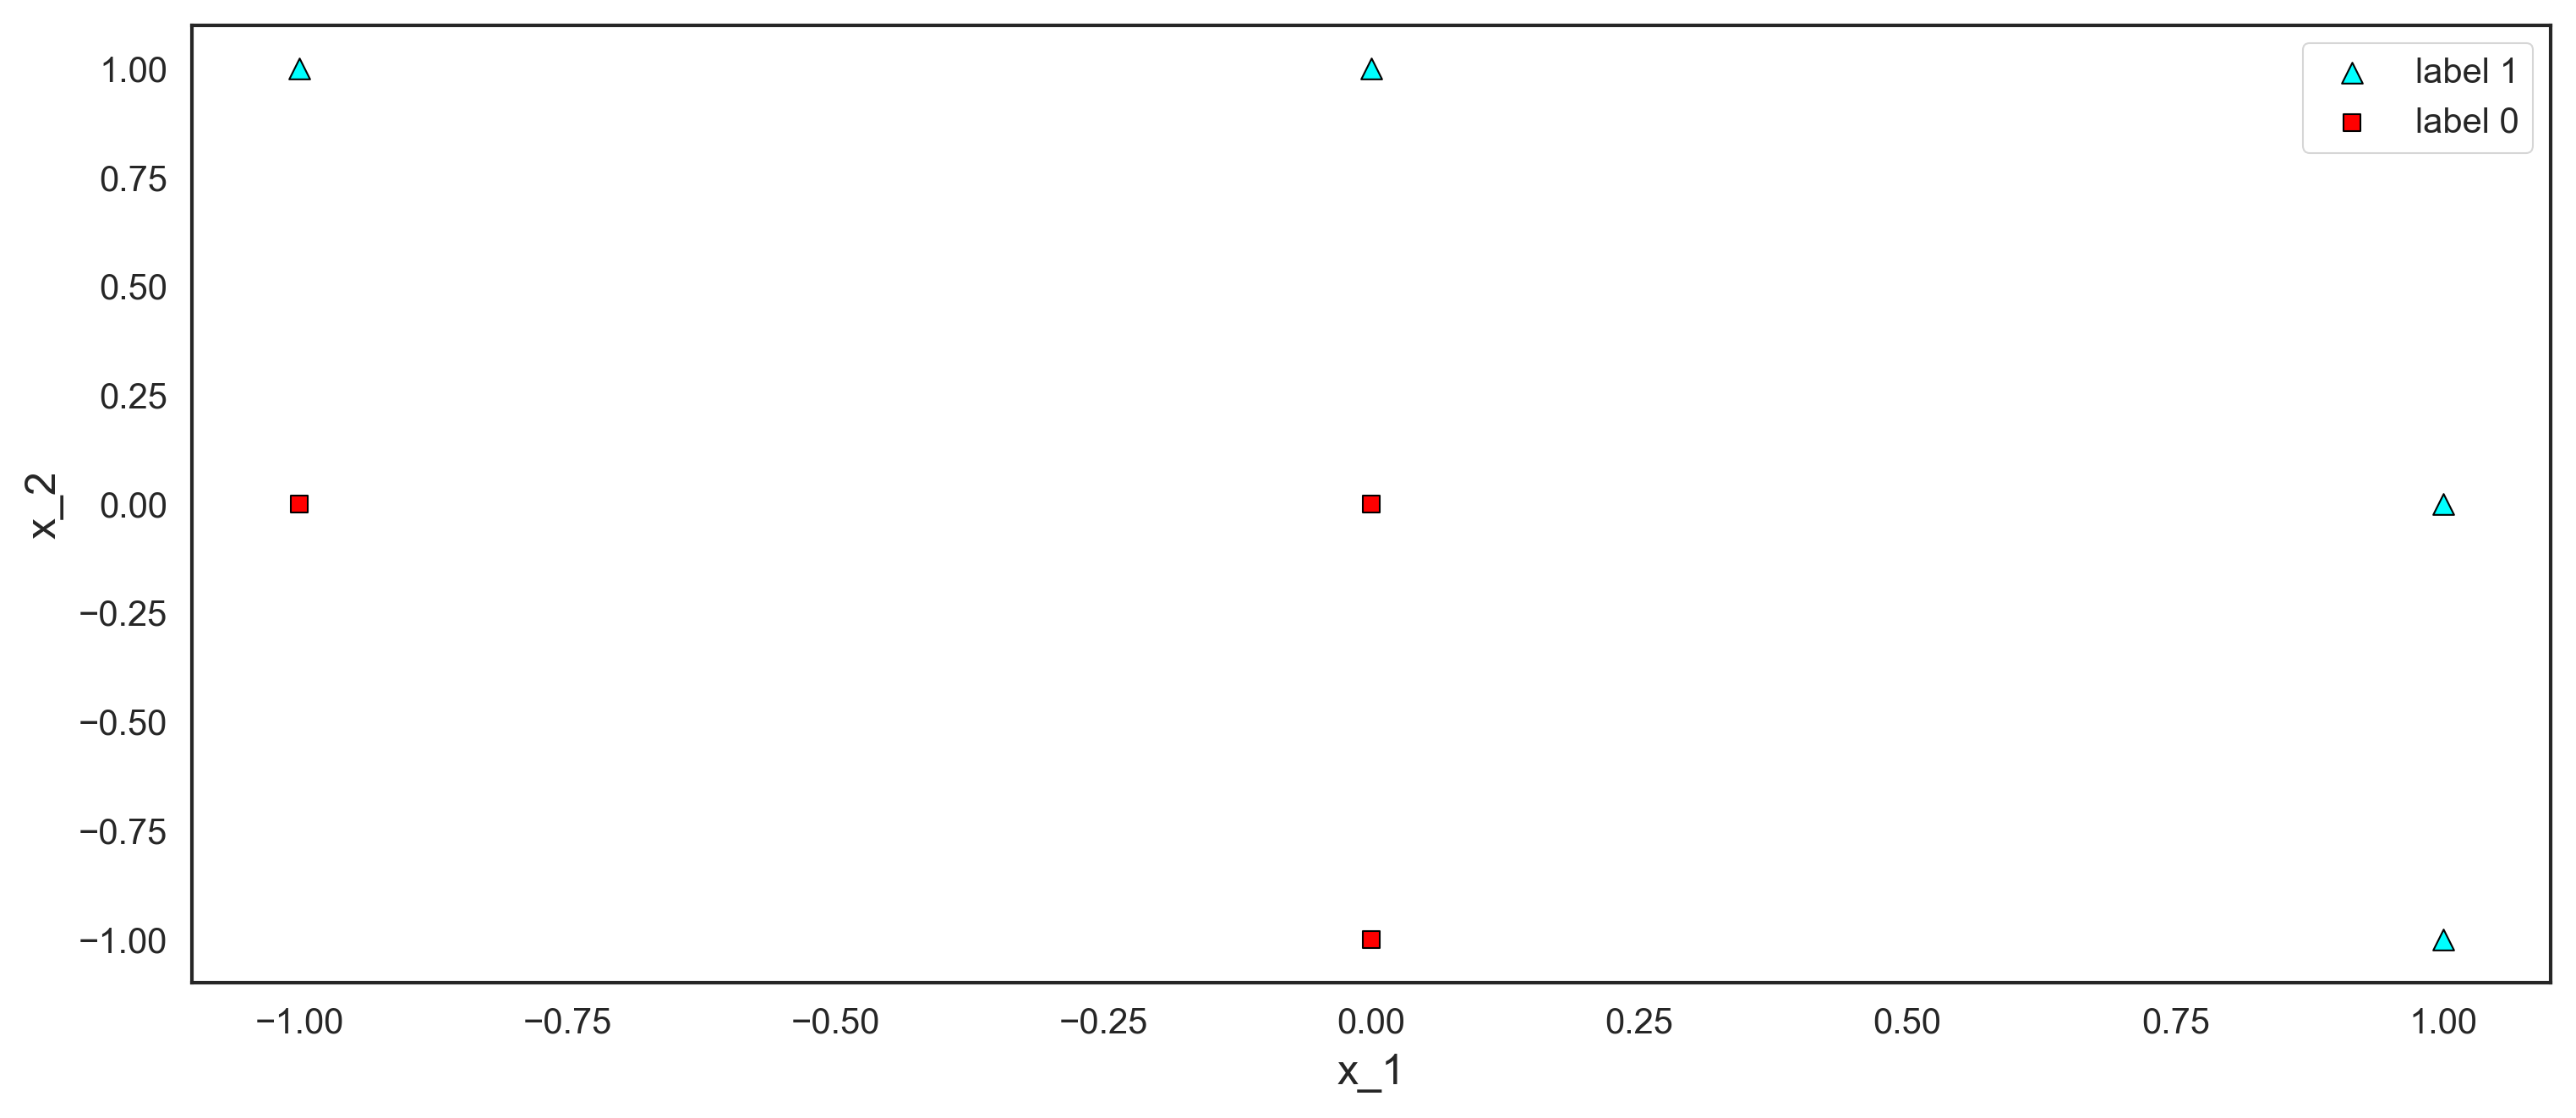

In [17]:
utils.plot_points(data[['x1','x2']], data['y'])

## Calculating the similarity matrix

In [19]:
def similarity(x,y):
    eq = np.exp(-(x[0]-y[0])**2 - (x[1]-y[1])**2)
    return eq